# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("/content/Profissao- Cientista de Dados_M10_support material.csv")

df = df.dropna()
df = df.drop_duplicates()

df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [3]:
df.columns

Index(['Unnamed: 0', 'data_ref', 'index', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'mau', 'renda'],
      dtype='object')

In [4]:
df = df[["posse_de_veiculo", "posse_de_imovel", "renda"]]

df.head()

,posse_de_veiculo,posse_de_imovel,renda
0,False,True,3369.24
1,True,True,6096.14
2,True,True,5658.98
3,True,False,7246.69
4,False,False,4017.37


In [5]:
df.shape

(12466, 3)

* Boxplot:


<Axes: xlabel='posse_de_veiculo', ylabel='renda'>

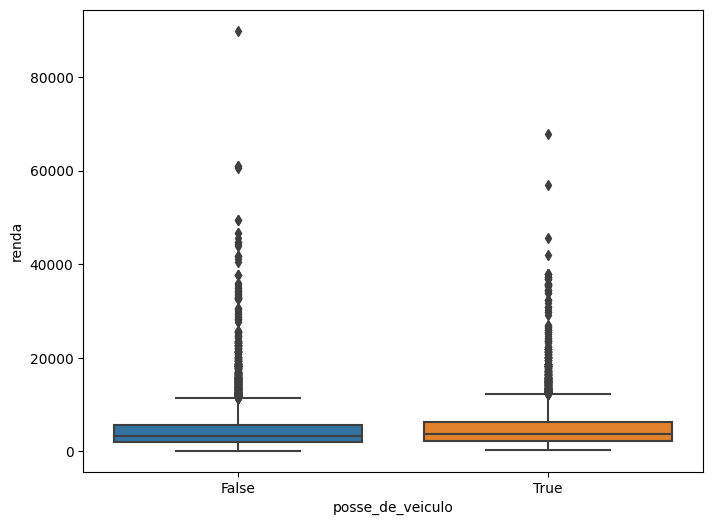

In [6]:
# Renda x Posse de Veículo:

plt.rc("figure", figsize=(8, 6))

sns.boxplot(x="posse_de_veiculo",
            y="renda", data=df)


<Axes: xlabel='posse_de_imovel', ylabel='renda'>

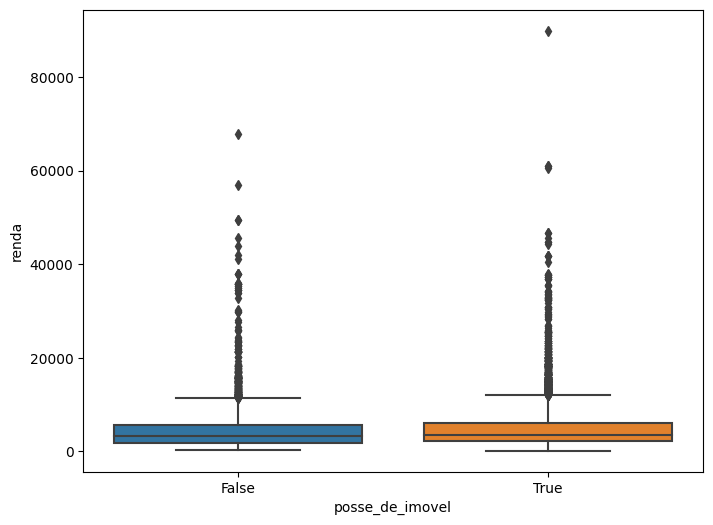

In [7]:
# Renda x Posse de Veículo:

plt.rc("figure", figsize=(8, 6))

sns.boxplot(x="posse_de_imovel",
            y="renda", data=df)


* Gráfico de Dispersão:

Text(0, 0.5, 'posse de veiculo')

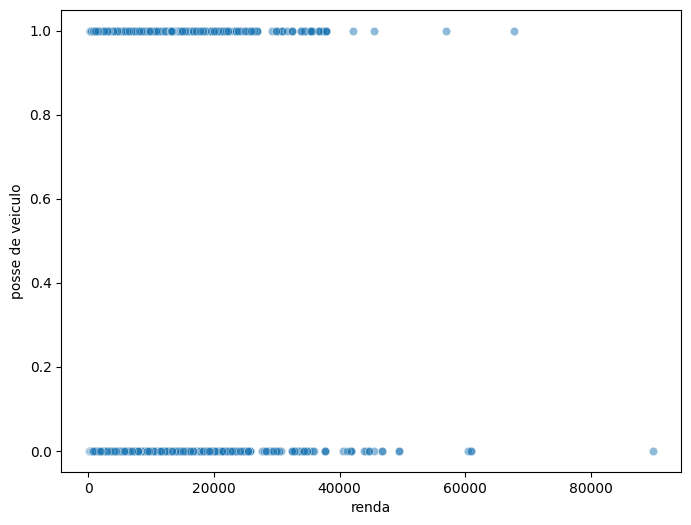

In [8]:
# Gráfico de dispersão relativo à posse de veículo e renda:

sns.scatterplot(x="renda",
                y="posse_de_veiculo",
                alpha=0.5,
                data=df)
plt.xlabel("renda")
plt.ylabel("posse de veiculo")

Text(0, 0.5, 'posse de imovel')

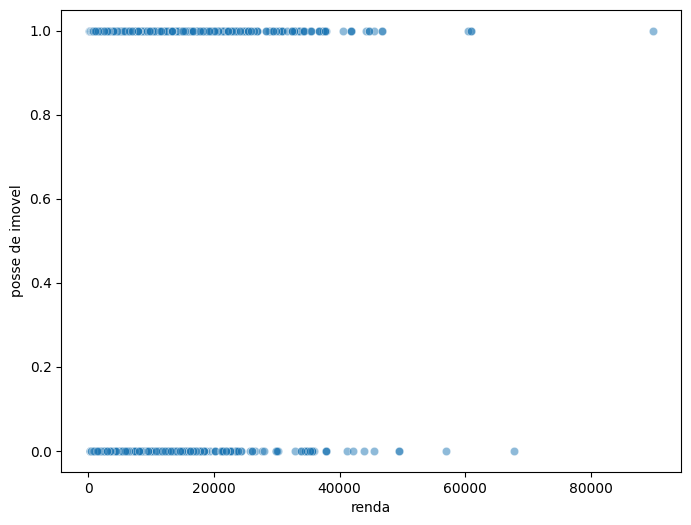

In [9]:
# Gráfico de dispersão relativo à posse de imóvel e renda:

sns.scatterplot(x="renda",
                y="posse_de_imovel",
                alpha=0.5,
                data=df)
plt.xlabel("renda")
plt.ylabel("posse de imovel")

Em ambos os gráficos gerados, nota-se uma elevada presença de outliers que podem estar interferindo negativamente na análise. Para tanto, irei criar um ranking que, talvez, possa auxiliar no tratamento dos dados, de tal modo que diminua os impactos negativos dos outiliers.

In [10]:
df.head()

,posse_de_veiculo,posse_de_imovel,renda
0,False,True,3369.24
1,True,True,6096.14
2,True,True,5658.98
3,True,False,7246.69
4,False,False,4017.37


In [11]:
# Criando o dataframe que considera o rank das variáveis, combinando-as
# com o dataframe original. O parâmetro que cria o rank é df3.rank().

df_rank = pd.concat([df, df.rank()], axis=1)
df_rank.columns = ["posse_de_veiculo", "posse_de_imovel", "renda",
                   "posse_de_veiculo_rank", "posse_de_imovel_rank",
                   "renda_rank"]

df_rank.head()

,posse_de_veiculo,posse_de_imovel,renda,posse_de_veiculo_rank,posse_de_imovel_rank,renda_rank
0,False,True,3369.24,3608.0,8403.0,6141.5
1,True,True,6096.14,9841.0,8403.0,9516.5
2,True,True,5658.98,9841.0,8403.0,9118.0
3,True,False,7246.69,9841.0,2170.0,10289.0
4,False,False,4017.37,3608.0,2170.0,7226.5


Analisando os gráficos novamente:

<Axes: xlabel='posse_de_veiculo_rank', ylabel='renda_rank'>

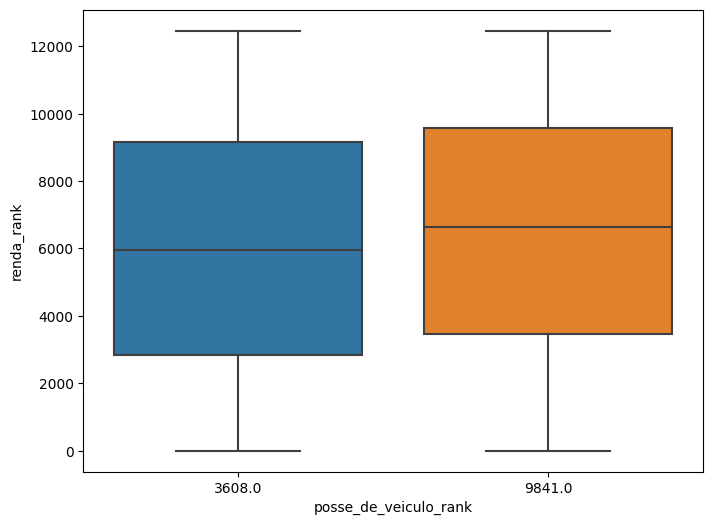

In [19]:
# Boxplot:

# Renda x Posse de Veículo:

plt.rc("figure", figsize=(8, 6))

sns.boxplot(x="posse_de_veiculo_rank",
            y="renda_rank", data=df_rank)


<Axes: xlabel='posse_de_imovel_rank', ylabel='renda_rank'>

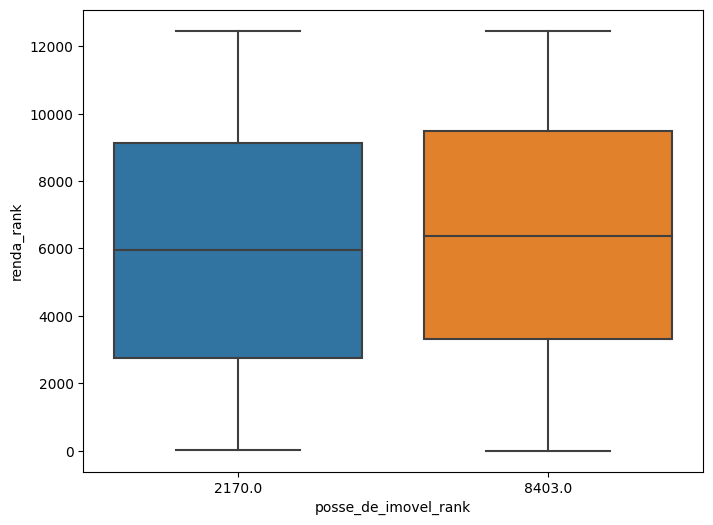

In [13]:
# Boxplot:

# Renda x Posse de Veículo:

plt.rc("figure", figsize=(8, 6))

sns.boxplot(x="posse_de_imovel_rank",
            y="renda_rank", data=df_rank)


A partir da utilização dos rankings para reduzir o impacto negativo dos outliers na geração dos gráficos e facilitar a análise, pode-se compreender que as pessoas que são proprietárias, tanto de veículos quanto de imóveis, apresentam uma renda superior, ainda que não gritante, em relação às não proprietárias. Isso se verifica pelo fato do boxplot dos que são proprietários apresentarem um segundo quartil, que coincide com a mediana, levemente superior em relação aos não proprietários, bem como o terceiro quartil.  

* Dúvida:

Eu gostaria de trocar o valor dos boxplots que aparecem como números, uma vez que cada qual representa False e True, respectivamente. Ou seja, o azul representa a porção de pessoas que não são proprietárias, enquanto que a laranja o oposto.

Text(0, 0.5, 'posse de veiculo')

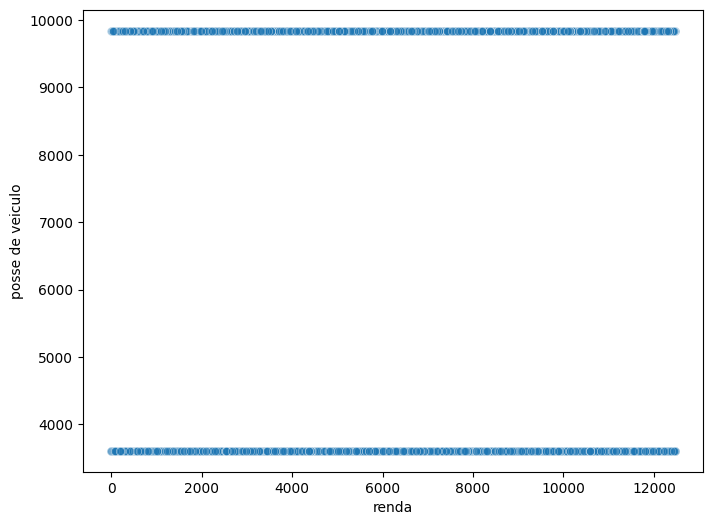

In [14]:
# Gráfico de dispersão:

# Renda x Posse de Veículo.

sns.scatterplot(x="renda_rank",
                y="posse_de_veiculo_rank",
                alpha=0.5,
                data=df_rank)
plt.xlabel("renda")
plt.ylabel("posse de veiculo")

Text(0, 0.5, 'posse de imovel')

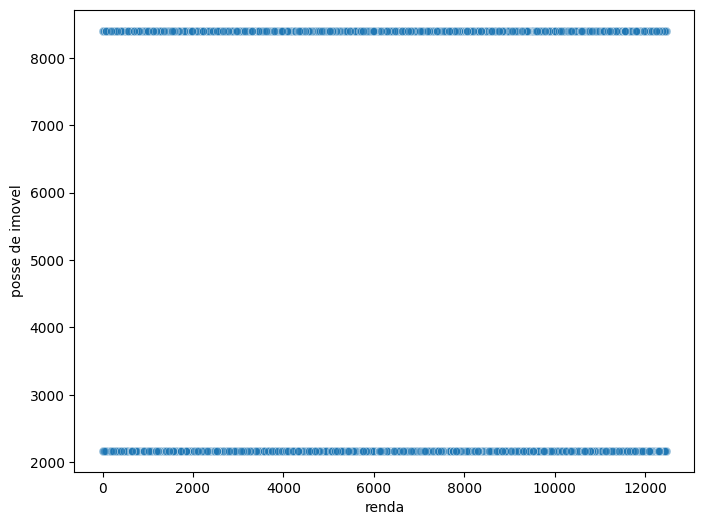

In [15]:
# Renda x Posse de Veículo.

sns.scatterplot(x="renda_rank",
                y="posse_de_imovel_rank",
                alpha=0.5,
                data=df_rank)
plt.xlabel("renda")
plt.ylabel("posse de imovel")

A partir desses gráficos de dispersão, apesar do uso dos rankings, pouco se pode concluir sobre uma relação significativa entre ser proprietário e possui maior renda.

<Axes: xlabel='posse_de_imovel_rank', ylabel='renda_rank'>

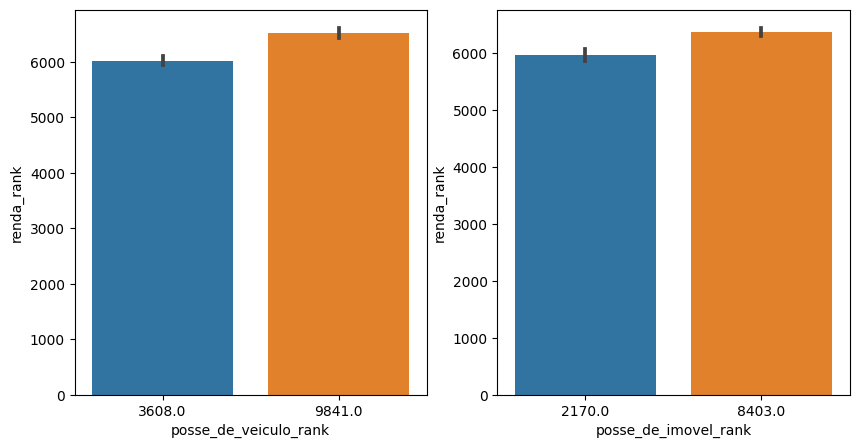

In [16]:
# Criando uma plotagem que terá como base a criação de
# dois gráficos de barras, para analisar o quanto as
# variáveis qualitativas se relacionam e explicam a renda.

fig, axes = plt.subplots(1,2, figsize=(10,5))

sns.barplot(ax = axes[0], x="posse_de_veiculo_rank", y="renda_rank",data=df_rank)
sns.barplot(ax = axes[1], x="posse_de_imovel_rank", y="renda_rank",data=df_rank)



Semelhante aos gráficos de boxplot, por meio dos gráficos de barras, compreende-se que aqueles que são proprietários possuem uma renda superior, ainda que não gritante, em relação aos que não proprietários.

<ipython-input-20-2bf80da17e1d>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.pointplot(x="posse_de_veiculo_rank", y="renda_rank",


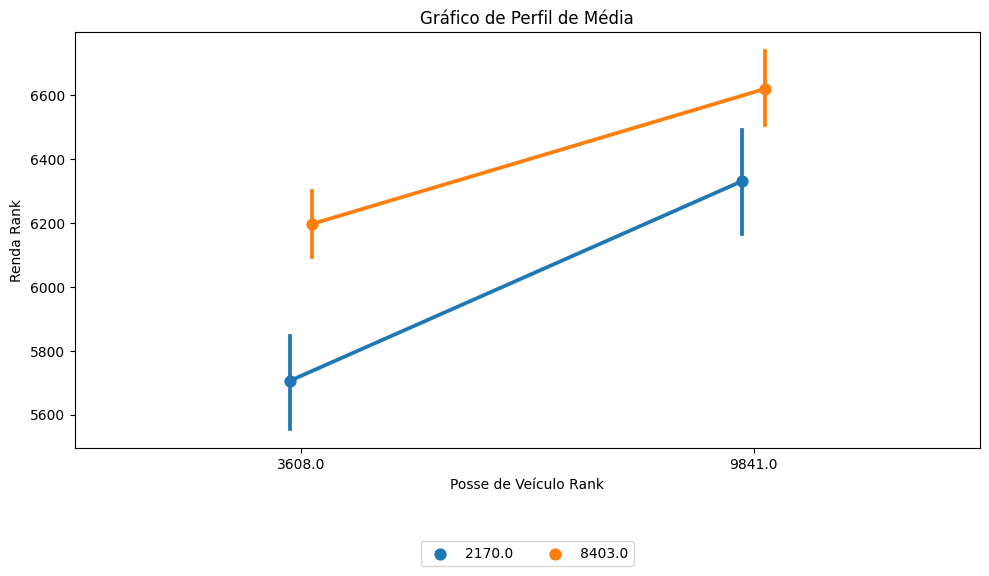

In [20]:
# Gráfico de perfil de média:

# Esse comando te ajuda a ajustar o tamanho da visualização, só alterar o número do parentese.
plt.figure(figsize=(10, 6))

ax = sns.pointplot(x="posse_de_veiculo_rank", y="renda_rank",
                   hue="posse_de_imovel_rank",
                   data=df_rank,
                   dodge=True, ci=95)

# Aqui conseguimos adicionar a legenda para explicar as cores dos gráficos
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.30), ncol=3)

# Adicione texto explicativo para as barras laranjas
ax.annotate('Proprietários de Imóveis', xy=(0.5, 0.2), xytext=(0.5, 0.2),
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=12, ha='center', va='center')

# Aqui adicionamos rótulos aos eixos e título
plt.xlabel("Posse de Veículo Rank")
plt.ylabel("Renda Rank")
plt.title("Gráfico de Perfil de Média")

# Ajuste o layout para evitar que os rótulos se sobreponham
plt.tight_layout()

plt.show()

Por meio desse gráfico, consegue-se observar com maior precisão que aqueles que são proprietários apresentam uma renda, em média, superior àqueles que não são proprietários, ainda que a essa não seja tão discrepante.

* Dúvida:

Como colocar uma legenda ou algo no gráfico demonstrando do que se trata as barras laranjas, que se referem aos proprietários de imóveis? Como eu poderia melhorar a visualização gráfica?